# Before you start :
   - These exercises are related to the Subsetting and Descriptive Stats lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary

In [156]:
# import libraries here
import pandas as pd
import numpy as np
import seaborn as sns
import pylab as plt
import warnings
warnings.simplefilter('ignore')

# Challenge 1

#### In this challenge we will use the `Temp_States.csv` file. 

#### First import it into a data frame called `temp`.

In [157]:
# your answer here
temp = pd.read_csv('Temp_states.csv')

#### Print `temp`

In [158]:
temp.head()

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333
3,Hartford,Connecticut,17.222222
4,Bridgeport,Connecticut,14.444444


#### Explore the data types of the Temp dataframe. What type of data do we have? Comment your result.

In [159]:
# your answer here
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   City         7 non-null      object 
 1   State        7 non-null      object 
 2   Temperature  7 non-null      float64
dtypes: float64(1), object(2)
memory usage: 296.0+ bytes


#### Select the rows where state is New York

In [160]:
# your answer here
temp.loc[temp['State'] == 'New York']

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333


#### What is the average of the temperature of cities in New York?

In [161]:
# your answer here
temp.groupby('State').mean().Temperature


State
Connecticut    15.833333
New Jersey     21.111111
New York       10.740741
Name: Temperature, dtype: float64

In [162]:
temp.loc[temp['State'] == 'New York'].mean().Temperature

10.74074074074074

#### We want to know cities and states with Temperature above 15 degress Celcius

In [163]:
# your answer here
temp.loc[temp.Temperature > 15]


,City,State,Temperature
0,NYC,New York,19.444444
3,Hartford,Connecticut,17.222222
5,Treton,New Jersey,22.222222
6,Newark,New Jersey,20.000000


#### Now, return only the cities that have a temperature above 15 degress Celcius

In [164]:
# your answer here
temp.loc[temp['Temperature'] > 15][['City']]

,City
0,NYC
3,Hartford
5,Treton
6,Newark


#### We want to know which cities have a temperature above 15 degrees Celcius and below 20 degrees Celcius

*Hint: First write the condition then select the rows.*

In [165]:
# your answer here
temp.loc[(temp['Temperature'] > 15) & (temp['Temperature'] < 20)]

,City,State,Temperature
0,NYC,New York,19.444444
3,Hartford,Connecticut,17.222222


#### Find the mean and the standard deviation of the temperature of each state.

*Hint: Use functions from Data Manipulation lesson*

In [166]:
# your answer here
print(temp.groupby('State').mean().Temperature)
print(temp.groupby('State').std().Temperature)

State
Connecticut    15.833333
New Jersey     21.111111
New York       10.740741
Name: Temperature, dtype: float64
State
Connecticut    1.964186
New Jersey     1.571348
New York       8.133404
Name: Temperature, dtype: float64


# Challenge 2

#### Load the `employee.csv` file into a DataFrame. Call the dataframe `employee`

In [167]:
# your answer here
employee = pd.read_csv('employee.csv')

#### Explore the data types of the Temp dataframe. Comment your results

In [168]:
# your answer here
employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        9 non-null      object
 1   Department  9 non-null      object
 2   Education   9 non-null      object
 3   Gender      9 non-null      object
 4   Title       9 non-null      object
 5   Years       9 non-null      int64 
 6   Salary      9 non-null      int64 
dtypes: int64(2), object(5)
memory usage: 632.0+ bytes


In [169]:
employee.head()
#Pequeño database con un salario poco claro (asumo que en dolares al año)

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55


#### Show visually the frequency distribution (histogram) of the employee dataset. In few words describe these histograms?

<Axes: xlabel='Years', ylabel='Count'>

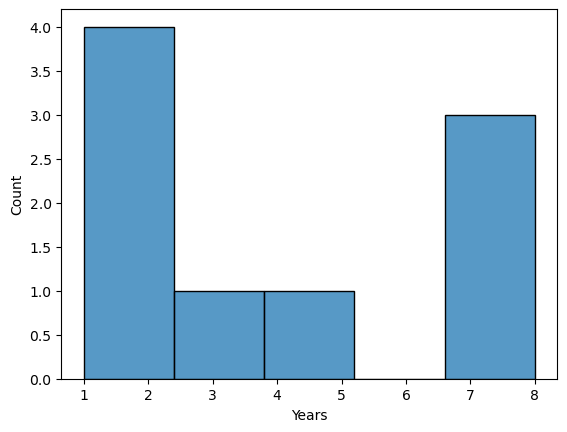

In [170]:
# your answer here
sns.histplot(employee.Years)
#mucha gente nueva y bastante que lleva mucho tiempo, entre medias poca gente

<Axes: xlabel='Salary', ylabel='Count'>

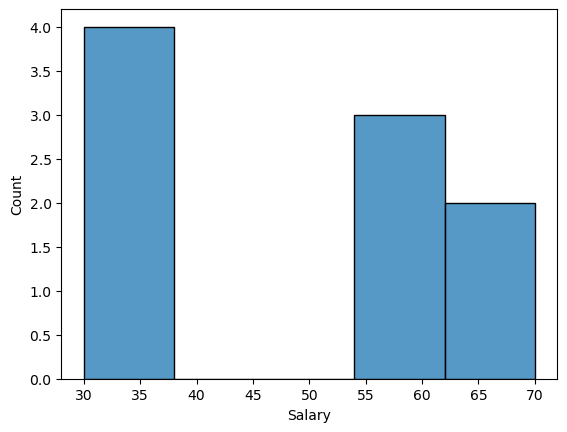

In [171]:
sns.histplot(employee.Salary)
#amplia diferencia entre los que cobran menos(que son más) y los que cobran más

#### What's the average salary in this company?

In [172]:
# your answer here
employee.Salary.mean()

48.888888888888886

#### What's the highest salary?

In [173]:
# your answer here
employee.Salary.max()

70

#### What's the lowest salary?

In [174]:
# your answer here
employee.Salary.min()

30

#### Who are the employees with the lowest salary?

In [175]:
# your answer here
employee.loc[employee.Salary<(np.percentile(employee.Salary, 25))][['Name','Salary']]

,Name,Salary
1,Maria,30
2,David,30


#### Could you give all the information about an employee called David?

In [176]:
# your answer here
employee.loc[employee.Name == 'David']

,Name,Department,Education,Gender,Title,Years,Salary
2,David,HR,Master,M,analyst,2,30


#### Could you give only David's salary?

In [177]:
# your answer here
employee.loc[employee.Name == 'David']['Salary']

2    30
Name: Salary, dtype: int64

#### Print all the rows where job title is associate

In [178]:
# your answer here
employee.loc[employee.Title == 'associate']

,Name,Department,Education,Gender,Title,Years,Salary
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
7,Pedro,IT,Phd,M,associate,7,60


#### Print the first 3 rows of your dataframe

##### Tip : There are 2 ways to do it. Do it both ways

In [179]:
# your answer here- 1 method
employee.head(3)

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


In [180]:
# your answer here- 2nd method
employee[0:3]

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


#### Find the employees who's title is associate and the salary above 55?

In [181]:
# your answer here
employee[(employee.Title == 'associate') & (employee.Salary > 55)]

,Name,Department,Education,Gender,Title,Years,Salary
7,Pedro,IT,Phd,M,associate,7,60


#### Group the employees based on their number of years of employment. What are the average salaries in each group?

In [182]:
# your answer here
employee.groupby('Years').mean().Salary

Years
1    35.000000
2    38.333333
3    55.000000
4    35.000000
7    60.000000
8    70.000000
Name: Salary, dtype: float64

####  What is the average Salary per title?

In [183]:
# your answer here
employee.groupby('Title').mean().Salary

Title
VP           70.000000
analyst      32.500000
associate    56.666667
Name: Salary, dtype: float64

#### Show a visual summary of the data using boxplot. What Are the First and Third Quartiles? Comment your results.
##### * Hint : Quantiles vs Quartiles*
##### - `In Probability and Statistics, quantiles are cut points dividing the range of a probability distribution into continuous intervals with equal probabilities. When division is into four parts the values of the variate corresponding to 25%, 50% and 75% of the total distribution are called quartiles.`

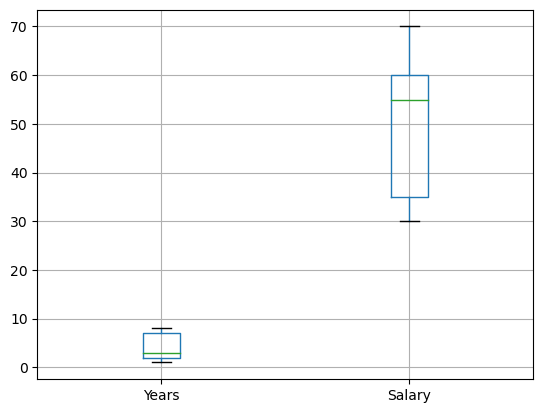

In [184]:
# draw boxplot here
employee.boxplot();

In [185]:
# print first quartile here
print(np.percentile(employee.Salary, 25))
np.percentile(employee.Years, 25)


35.0


2.0

In [186]:
# print third quartile here
print(np.percentile(employee.Salary, 75))
np.percentile(employee.Years, 75)


60.0


7.0

#### Is the mean salary per gender different?

In [187]:
# your answer here
employee.groupby('Gender').mean().Salary

Gender
F    47.5
M    50.0
Name: Salary, dtype: float64

#### Find the minimum, mean and the maximum of all numeric columns for each Department.

##### Hint: Use functions from Data Manipulation lesson

In [188]:
# your answer here
employee.groupby('Department').mean()
employee2 = employee.copy()
employee2.groupby('Department').min()._get_numeric_data()
employee2.groupby('Department').max()._get_numeric_data()
employee2.groupby('Department').mean()

,Years,Salary
Department,,
HR,4.666667,45.00
IT,4.500000,48.75
Sales,2.500000,55.00


### Bonus Question

#### For each department, compute the difference between the maximal salary and the minimal salary.

##### * Hint: try using `agg` or `apply` and `lambda`*

In [189]:
# your answer here

# Challenge 3

#### Open the Orders.csv dataset. Name your dataset orders

In [190]:
# your answer here
orders = pd.read_csv('Orders/Orders.csv')

In [191]:
orders.columns=[e.lower().replace(' ', '_') for e in orders.columns]

#### Explore your dataset by looking at the data types and the summary statistics. Comment your results

In [192]:
# your answer here
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397924 entries, 0 to 397923
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   unnamed:_0    397924 non-null  int64  
 1   invoiceno     397924 non-null  int64  
 2   stockcode     397924 non-null  object 
 3   year          397924 non-null  int64  
 4   month         397924 non-null  int64  
 5   day           397924 non-null  int64  
 6   hour          397924 non-null  int64  
 7   description   397924 non-null  object 
 8   quantity      397924 non-null  int64  
 9   invoicedate   397924 non-null  object 
 10  unitprice     397924 non-null  float64
 11  customerid    397924 non-null  int64  
 12  country       397924 non-null  object 
 13  amount_spent  397924 non-null  float64
dtypes: float64(2), int64(8), object(4)
memory usage: 42.5+ MB


In [193]:
# your answer here
orders.describe().T

,count,mean,std,min,25%,50%,75%,max
unnamed:_0,397924.0,278465.221859,152771.368303,0.0,148333.75,284907.50,410079.25,541908.00
invoiceno,397924.0,560617.126645,13106.167695,536365.0,549234.00,561893.00,572090.00,581587.00
year,397924.0,2010.934259,0.247829,2010.0,2011.00,2011.00,2011.00,2011.00
month,397924.0,7.612537,3.416527,1.0,5.00,8.00,11.00,12.00
day,397924.0,3.614555,1.928274,1.0,2.00,3.00,5.00,7.00
hour,397924.0,12.728247,2.273535,6.0,11.00,13.00,14.00,20.00
quantity,397924.0,13.021823,180.420210,1.0,2.00,6.00,12.00,80995.00
unitprice,397924.0,3.116174,22.096788,0.0,1.25,1.95,3.75,8142.75
customerid,397924.0,15294.315171,1713.169877,12346.0,13969.00,15159.00,16795.00,18287.00
amount_spent,397924.0,22.394749,309.055588,0.0,4.68,11.80,19.80,168469.60


####  What is the average Purchase Price?

In [194]:
# your answer here
orders.amount_spent.mean()

22.394748504739596

#### What were the highest and lowest purchase prices? 

In [195]:
# your answer here
orders.amount_spent.max()

168469.6

In [196]:
# your answer here
orders.amount_spent.min()

0.0

#### Select all the customers we have in Spain

In [197]:
# your answer here
orders[orders.country == 'Spain']

,unnamed:_0,invoiceno,stockcode,year,month,day,hour,description,quantity,invoicedate,unitprice,customerid,country,amount_spent
4250,6421,536944,22383,2010,12,5,12,lunch bag suki design,70,2010-12-03 12:20:00,1.65,12557,Spain,115.50
4251,6422,536944,22384,2010,12,5,12,lunch bag pink polkadot,100,2010-12-03 12:20:00,1.45,12557,Spain,145.00
4252,6423,536944,20727,2010,12,5,12,lunch bag black skull.,60,2010-12-03 12:20:00,1.65,12557,Spain,99.00
4253,6424,536944,20725,2010,12,5,12,lunch bag red retrospot,70,2010-12-03 12:20:00,1.65,12557,Spain,115.50
4254,6425,536944,20728,2010,12,5,12,lunch bag cars blue,100,2010-12-03 12:20:00,1.45,12557,Spain,145.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394733,535271,581193,23291,2011,12,3,17,dolly girl childrens cup,2,2011-12-07 17:05:00,1.25,17097,Spain,2.50
394734,535272,581193,85232D,2011,12,3,17,set/3 decoupage stacking tins,1,2011-12-07 17:05:00,4.95,17097,Spain,4.95
394735,535273,581193,22721,2011,12,3,17,set of 3 cake tins sketchbook,2,2011-12-07 17:05:00,1.95,17097,Spain,3.90
394736,535274,581193,23241,2011,12,3,17,treasure tin gymkhana design,1,2011-12-07 17:05:00,2.08,17097,Spain,2.08


#### How many customers do we have in Spain?
##### Hint : Use value_counts()

In [198]:
# your answer here
orders[orders.country == 'Spain']['customerid'].value_counts().count()

30

#### Select all the customers who have bought more than 50 items ?

In [199]:
# your answer here
orders[orders.quantity > 50][['customerid','quantity']].head()

,customerid,quantity
46,13748,80
83,15291,64
96,14688,120
102,14688,96
174,16029,100


#### Select orders from Spain that are above 50 items

In [200]:
# your answer here
orders[(orders.quantity > 50) & (orders.country == 'Spain')].head()

,unnamed:_0,invoiceno,stockcode,year,month,day,hour,description,quantity,invoicedate,unitprice,customerid,country,amount_spent
4250,6421,536944,22383,2010,12,5,12,lunch bag suki design,70,2010-12-03 12:20:00,1.65,12557,Spain,115.5
4251,6422,536944,22384,2010,12,5,12,lunch bag pink polkadot,100,2010-12-03 12:20:00,1.45,12557,Spain,145.0
4252,6423,536944,20727,2010,12,5,12,lunch bag black skull.,60,2010-12-03 12:20:00,1.65,12557,Spain,99.0
4253,6424,536944,20725,2010,12,5,12,lunch bag red retrospot,70,2010-12-03 12:20:00,1.65,12557,Spain,115.5
4254,6425,536944,20728,2010,12,5,12,lunch bag cars blue,100,2010-12-03 12:20:00,1.45,12557,Spain,145.0


#### Select all free orders

In [201]:
# your answer here
orders[orders.amount_spent == 0].head()

,unnamed:_0,invoiceno,stockcode,year,month,day,hour,description,quantity,invoicedate,unitprice,customerid,country,amount_spent
6914,9302,537197,22841,2010,12,7,14,round cake tin vintage green,1,2010-12-05 14:02:00,0.0,12647,Germany,0.0
22539,33576,539263,22580,2010,12,4,14,advent calendar gingham sack,4,2010-12-16 14:36:00,0.0,16560,United Kingdom,0.0
25379,40089,539722,22423,2010,12,2,13,regency cakestand 3 tier,10,2010-12-21 13:45:00,0.0,14911,EIRE,0.0
29080,47068,540372,22090,2011,1,4,16,paper bunting retrospot,24,2011-01-06 16:41:00,0.0,13081,United Kingdom,0.0
29082,47070,540372,22553,2011,1,4,16,plasters in tin skulls,24,2011-01-06 16:41:00,0.0,13081,United Kingdom,0.0


#### Select all orders that are 'lunch bag'
#### Hint: Use string functions

In [202]:
# your answer here
orders[orders.description.str.contains('lunch bag')].head()

,unnamed:_0,invoiceno,stockcode,year,month,day,hour,description,quantity,invoicedate,unitprice,customerid,country,amount_spent
93,93,536378,20725,2010,12,3,9,lunch bag red retrospot,10,2010-12-01 09:37:00,1.65,14688,United Kingdom,16.50
172,174,536385,22662,2010,12,3,9,lunch bag dolly girl design,10,2010-12-01 09:56:00,1.65,17420,United Kingdom,16.50
354,363,536401,22662,2010,12,3,11,lunch bag dolly girl design,1,2010-12-01 11:21:00,1.65,15862,United Kingdom,1.65
359,368,536401,20725,2010,12,3,11,lunch bag red retrospot,1,2010-12-01 11:21:00,1.65,15862,United Kingdom,1.65
360,369,536401,22382,2010,12,3,11,lunch bag spaceboy design,2,2010-12-01 11:21:00,1.65,15862,United Kingdom,3.30


#### Select all orders that are made in 2011 and are 'lunch bag'  

In [203]:
# your answer here
orders[(orders.year == 2011) & (orders.description.str.contains('lunch bag'))].head()

,unnamed:_0,invoiceno,stockcode,year,month,day,hour,description,quantity,invoicedate,unitprice,customerid,country,amount_spent
26340,42678,540015,20725,2011,1,2,11,lunch bag red retrospot,10,2011-01-04 11:40:00,1.65,13319,United Kingdom,16.50
26341,42679,540015,20726,2011,1,2,11,lunch bag woodland,10,2011-01-04 11:40:00,1.65,13319,United Kingdom,16.50
26512,42851,540023,22382,2011,1,2,12,lunch bag spaceboy design,2,2011-01-04 12:58:00,1.65,15039,United Kingdom,3.30
26513,42852,540023,20726,2011,1,2,12,lunch bag woodland,1,2011-01-04 12:58:00,1.65,15039,United Kingdom,1.65
26860,43616,540098,22384,2011,1,2,15,lunch bag pink polkadot,1,2011-01-04 15:50:00,1.65,16241,United Kingdom,1.65


#### Show the frequency distribution of the amount spent in Spain.

In [204]:
# your answer here
orders[orders.country == 'Spain'][['amount_spent']].value_counts()

amount_spent
15.00           186
17.70           122
19.80            99
17.40            86
10.20            76
               ... 
17.90             1
16.65             1
14.94             1
14.22             1
17.25             1
Length: 316, dtype: int64

#### Select all orders made in the month of August

In [205]:
# your answer here
orders[orders.month == 8].head()

,unnamed:_0,invoiceno,stockcode,year,month,day,hour,description,quantity,invoicedate,unitprice,customerid,country,amount_spent
199475,285421,561904,22075,2011,8,1,8,6 ribbons elegant christmas,96,2011-08-01 08:30:00,1.45,17941,United Kingdom,139.20
199476,285422,561904,85049E,2011,8,1,8,scandinavian reds ribbons,156,2011-08-01 08:30:00,1.06,17941,United Kingdom,165.36
199477,285423,561905,21385,2011,8,1,9,ivory hanging decoration heart,24,2011-08-01 09:31:00,0.85,14947,United Kingdom,20.40
199478,285424,561905,84970L,2011,8,1,9,single heart zinc t-light holder,12,2011-08-01 09:31:00,0.95,14947,United Kingdom,11.40
199479,285425,561905,84970S,2011,8,1,9,hanging heart zinc t-light holder,12,2011-08-01 09:31:00,0.85,14947,United Kingdom,10.20


#### Select how many orders are made by countries in the month of August
##### Hint: Use value_counts()

In [206]:
# your answer here
orders[orders.month == 8][['country', 'invoiceno']].groupby('country').count().head()

,invoiceno
country,
Australia,107
Austria,88
Belgium,194
Canada,5
Channel Islands,140


#### What's the  average amount of money spent by country

In [207]:
# your answer here
orders[['country', 'amount_spent']].groupby('country').mean().head()

,amount_spent
country,
Australia,116.895620
Austria,25.624824
Bahrain,32.258824
Belgium,20.283772
Brazil,35.737500


#### What's the most expensive item?

In [208]:
# your answer here
orders[orders.unitprice == orders['unitprice'].max()][['description','unitprice']]

,description,unitprice
118352,postage,8142.75


#### What was the average amount spent per year ?

In [209]:
# your answer here
orders[['year','amount_spent']].groupby('year').mean()

,amount_spent
year,
2010,21.892733
2011,22.430074
